# Feature maps

In [20]:
%pip install keras --upgrade

Note: you may need to restart the kernel to use updated packages.


In [21]:
%pip install numpy==1.21

Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np

In [37]:
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
for layer in model.layers:
 # check for convolutional layer
     if 'conv' in layer.name:
 # get filter weights
         filters, biases = layer.get_weights()
         print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [40]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import img_to_array, load_img
from keras.models import Model

In [42]:
fmap_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [46]:
fmap_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


### Convolutional layers
User 3x3 filters.

In [47]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [58]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [64]:
# 3x3 filter, 3 channels, 64 filters
filters.shape

(3, 3, 3, 64)

In [65]:
filters[:,:,0,0]

array([[0.8601116 , 0.81635594, 0.47662497],
       [0.7392438 , 0.55478704, 0.23765364],
       [0.47966576, 0.31966972, 0.25103468]], dtype=float32)

In [76]:
import matplotlib.pyplot as plt

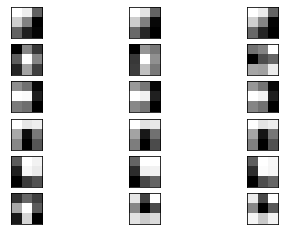

In [79]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(3):
 # specify subplot and turn of axis
     ax = plt.subplot(n_filters, 3, ix)
     ax.set_xticks([])
     ax.set_yticks([])
 # plot filter channel in grayscale
     plt.imshow(f[:, :, j], cmap='gray')
     ix += 1
# show the figure
plt.show()

## Comments
The filter across the rows can sometimes differ.
Dark squares indicate small weights.
Light squares indicate large weights.

### Example
The first row of filters will detect a gradient from light in top left to dark in the bottom right.

## 2nd convolutional layer
Looking at filters in the second convolutional layer, we can see that again we have 64 filters, but each has 64 channels to match the input feature maps. To see all 64 channels in a row for all 64 filters would require (64×64) 4,096 subplots in which it may be challenging to see any detail.

## Visualise feature maps

Activation maps **called feature maps** show the result of applying the filters to inputs.
The input could be an input image or another feature map.

We can visualise what features are detected by a feature map. Certain feature maps will detect small details in the earlier layers and they'll capture more larger patterns closer to the output.

In [81]:
import os

In [ ]:
os.get

In [102]:
os.chdir('feature-maps')

In [103]:
os.listdir()

['img', '.ipynb_checkpoints', 'featuremaps.ipynb']

In [104]:
filepath = os.getcwd() + '/img/' 
filename = 'bird.jpeg'

In [89]:
# summarize feature map size for each conv layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
     layer = model.layers[i]
 # check for convolutional layer
     if 'conv' not in layer.name:
         continue
 # summarize output shape
     else:
         print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [90]:
fmp_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [105]:
# load in the img
IMG_SIZE= 224
img = load_img(filepath + filename, target_size = (IMG_SIZE, IMG_SIZE))

In [107]:
type(img)

PIL.Image.Image

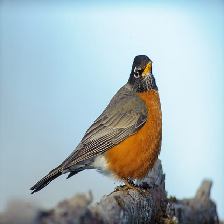

In [108]:
img